In [18]:
from qiskit import *
from qiskit.visualization import plot_histogram
import qiskit

In [19]:
qiskit.__version__

'0.19.1'

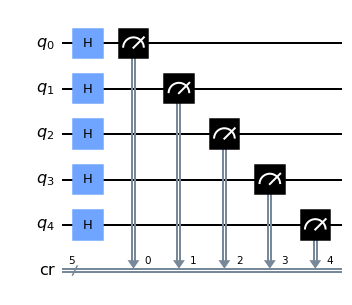

In [20]:
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister(5, 'cr')
circuit = QuantumCircuit(qr, cr)
circuit.h(qr)
circuit.measure(qr, cr)
circuit.draw('mpl', fold=-1)

In [21]:
def generateRandomNumber():
    backend = Aer.get_backend('statevector_simulator')
    outcome = execute(circuit, backend, shots=1).result()
    counts = outcome.get_counts(circuit)
    print(counts)
    for i in counts.keys():
        print('The random number is', int(i,2))
    plot_histogram(counts)

In [22]:
generateRandomNumber()

{'00111': 1}
The random number is 7


In [23]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

In [24]:
# Account thanhhoan
# IBMQ.save_account('e1681a4f46a841f765cb31a97611e62cdce002bee31a9038df3487039096f3f52e69d819d63d94d895108367a4d0a9b76130cb2d5945bd8db32179bd53d28f7d',overwrite=True)
provider = IBMQ.load_account()


ibmqfactory.load_account:WARNING:2022-02-04 14:49:19,948: Credentials are already in use. The existing account in the session will be replaced.


In [28]:
provider = IBMQ.get_provider(hub='ibm-q-melbourne')
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmq_guadalupe


In [27]:
transpile_circuit = transpile(circuit, device, optimization_level=3)
job = device.run(transpile_circuit)
job_monitor(job, interval = 1)

KeyboardInterrupt: 

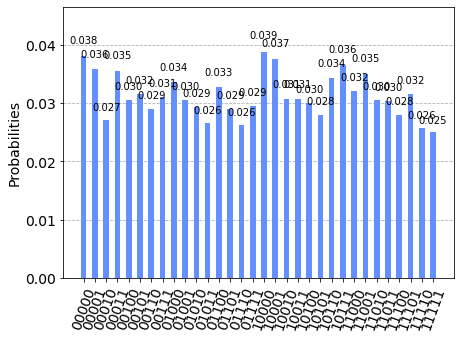

In [ ]:
results = job.result()
answer = results.get_counts(circuit)
plot_histogram(answer)

In [17]:
# print(answer.most_frequent)

results = answer.int_outcomes()
sortedResult = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

# Get one most frequent output
result = max(results, key=results.get)
print('The random number is', result)

# Get all most frequent output
mostfreq = max(results.values())
print(f'All of the approriate random number (most frequent with {mostfreq} appearances) are ', [k for k,v in results.items() if v == mostfreq])

The random number is 16
All of the approriate random number (most frequent with 155 appearances) are  [16]
